For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
3. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
4. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
date = 'date'
data = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df = pd.DataFrame(data)
df.head()


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
l = df['value'].quantile(0.025)
h = df['value'].quantile(0.975)

df1 = df[(df['value'] >= l) & (df['value'] <= h)]
print(df1)

            date   value
10    2016-05-19   19736
17    2016-05-26   18060
18    2016-05-27   19997
19    2016-05-28   19044
20    2016-05-29   20325
...          ...     ...
1294  2019-11-24  138875
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1303  2019-12-03  158549

[1238 rows x 2 columns]


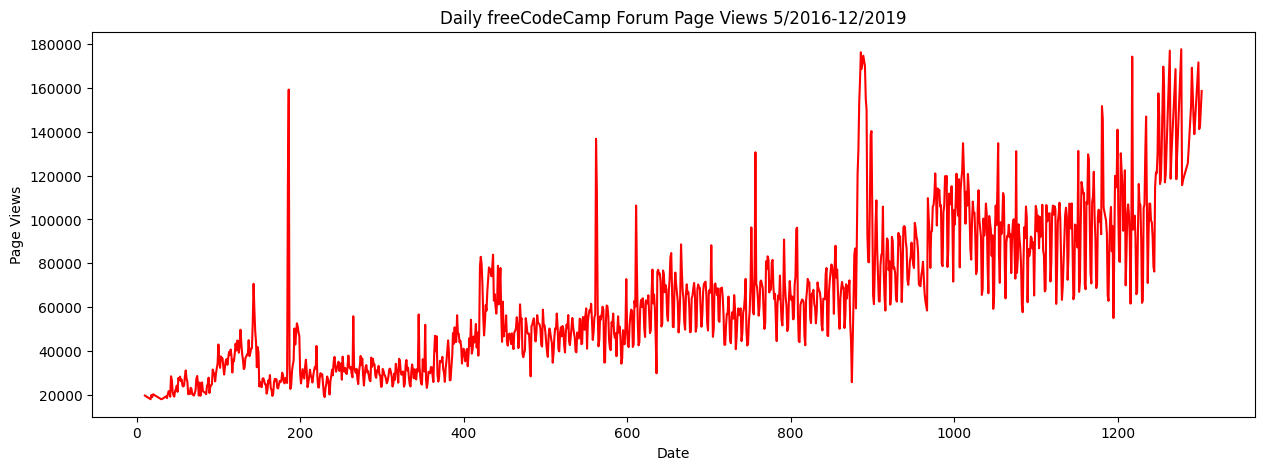

In [ ]:
x = df1.index
y = df1['value']
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x,y, color = 'red', linewidth = 1.5)
ax.set(title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel = "Date", ylabel = "Page Views")
fig.savefig('line_plot.png')

In [ ]:
data_2016_to_2019 = df.groupby([df.index.strftime('%Y-%m')])['value'].mean().reset_index(name = 'Average Page Views')
data_2016_to_2019_month = []
data_2016_to_2019_views =  []
for i in data_2016_to_2019['date']:
    data_2016_to_2019_month.append(i)
for j in data_2016_to_2019['Average Page Views']:
    data_2016_to_2019_views.append(j)

data_2016_to_2019_dict = dict(zip(data_2016_to_2019_month,data_2016_to_2019_views))

data_2016_list = []
for i in range (0,4):
    data_2016_list.append(0)
data_2017_list = []
data_2018_list = []
data_2019_list = []
for i in data_2016_to_2019['date']:
    if '2016' in i:
        data_2016_list.append(i)
for i in data_2016_to_2019['date']:
    if '2017' in i:
        data_2017_list.append(i)
for i in data_2016_to_2019['date']:
    if '2018' in i:
        data_2018_list.append(i)
for i in data_2016_to_2019['date']:
    if '2019' in i:
        data_2019_list.append(i)

In [ ]:
data_2016_views_list = []
for i in range(0,4):
    data_2016_views_list.append(0)
data_2017_views_list = []
data_2018_views_list = []
data_2019_views_list = []
for i in data_2016_to_2019_dict.keys():
    if '2016' in i:
        data_2016_views_list.append(data_2016_to_2019_dict.get(i))
    elif '2017' in i:
        data_2017_views_list.append(data_2016_to_2019_dict.get(i))
    elif '2018' in i:
        data_2018_views_list.append(data_2016_to_2019_dict.get(i))
    elif '2019' in i:
        data_2019_views_list.append(data_2016_to_2019_dict.get(i))

In [ ]:
year = ['2017','2018','2019']
views = [data_2017_views_list,data_2018_views_list,data_2019_views_list]
dict_views_2017_to_2019 = dict(zip(year,views))
df_views_2017_to_2019 = pd.DataFrame(dict_views_2017_to_2019)
df_views_2016 = pd.DataFrame({'2016' : data_2016_views_list})
df_views_new = pd.concat([df_views_2016,df_views_2017_to_2019], axis = 1)
df_views_new['2016'] = df_views_new['2016'].fillna(0)
df_views_new['months'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_views_final = df_views_new.set_index('months')
df_views_final.T

months,January,February,March,April,May,June,July,August,September,October,November,December
2016,0.000000,0.000000,0.000000,0.000000,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


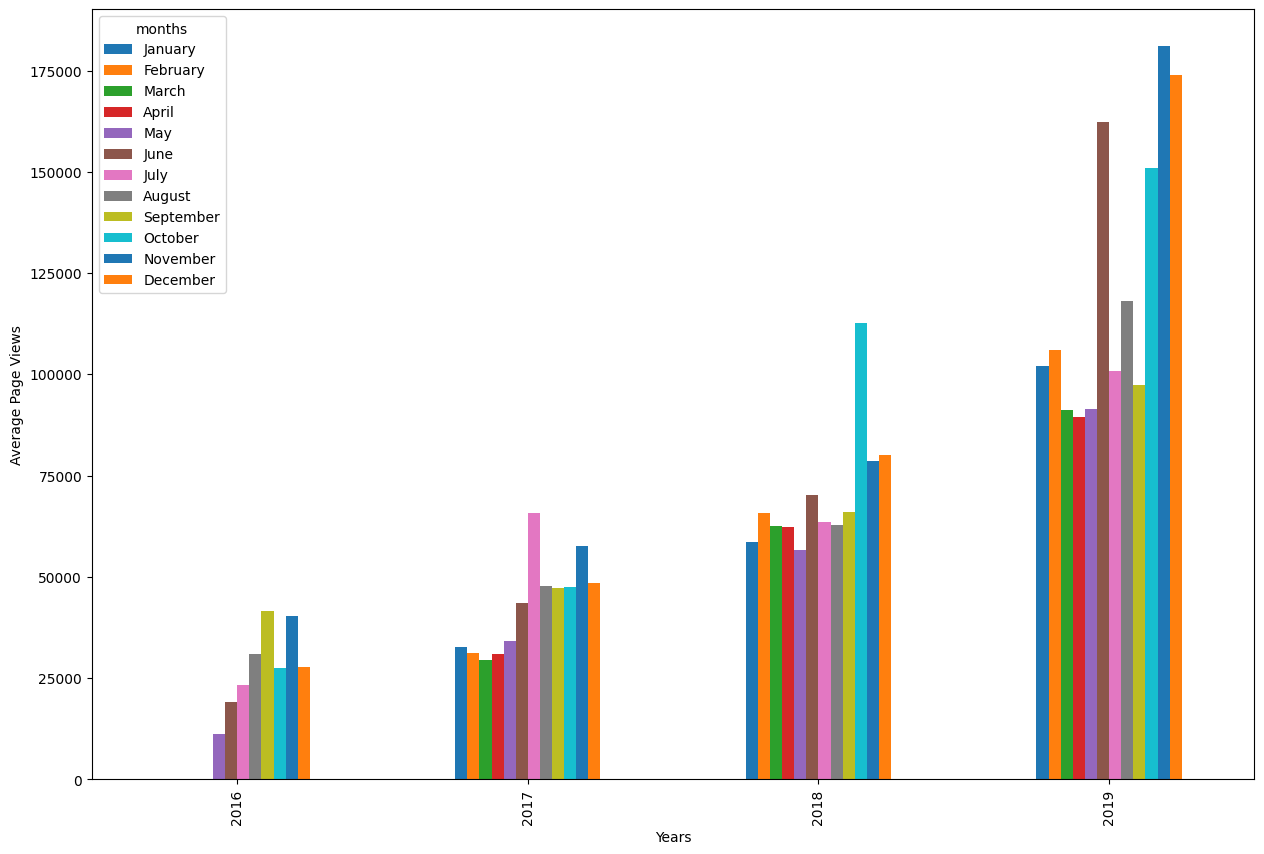

In [ ]:
df_views_final.T.plot.bar(figsize = (15,10), xlabel = "Years", ylabel = "Average Page Views")
plt.show()

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May
...,...,...,...,...
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec
1302,2019-12-02,220144,2019,Dec


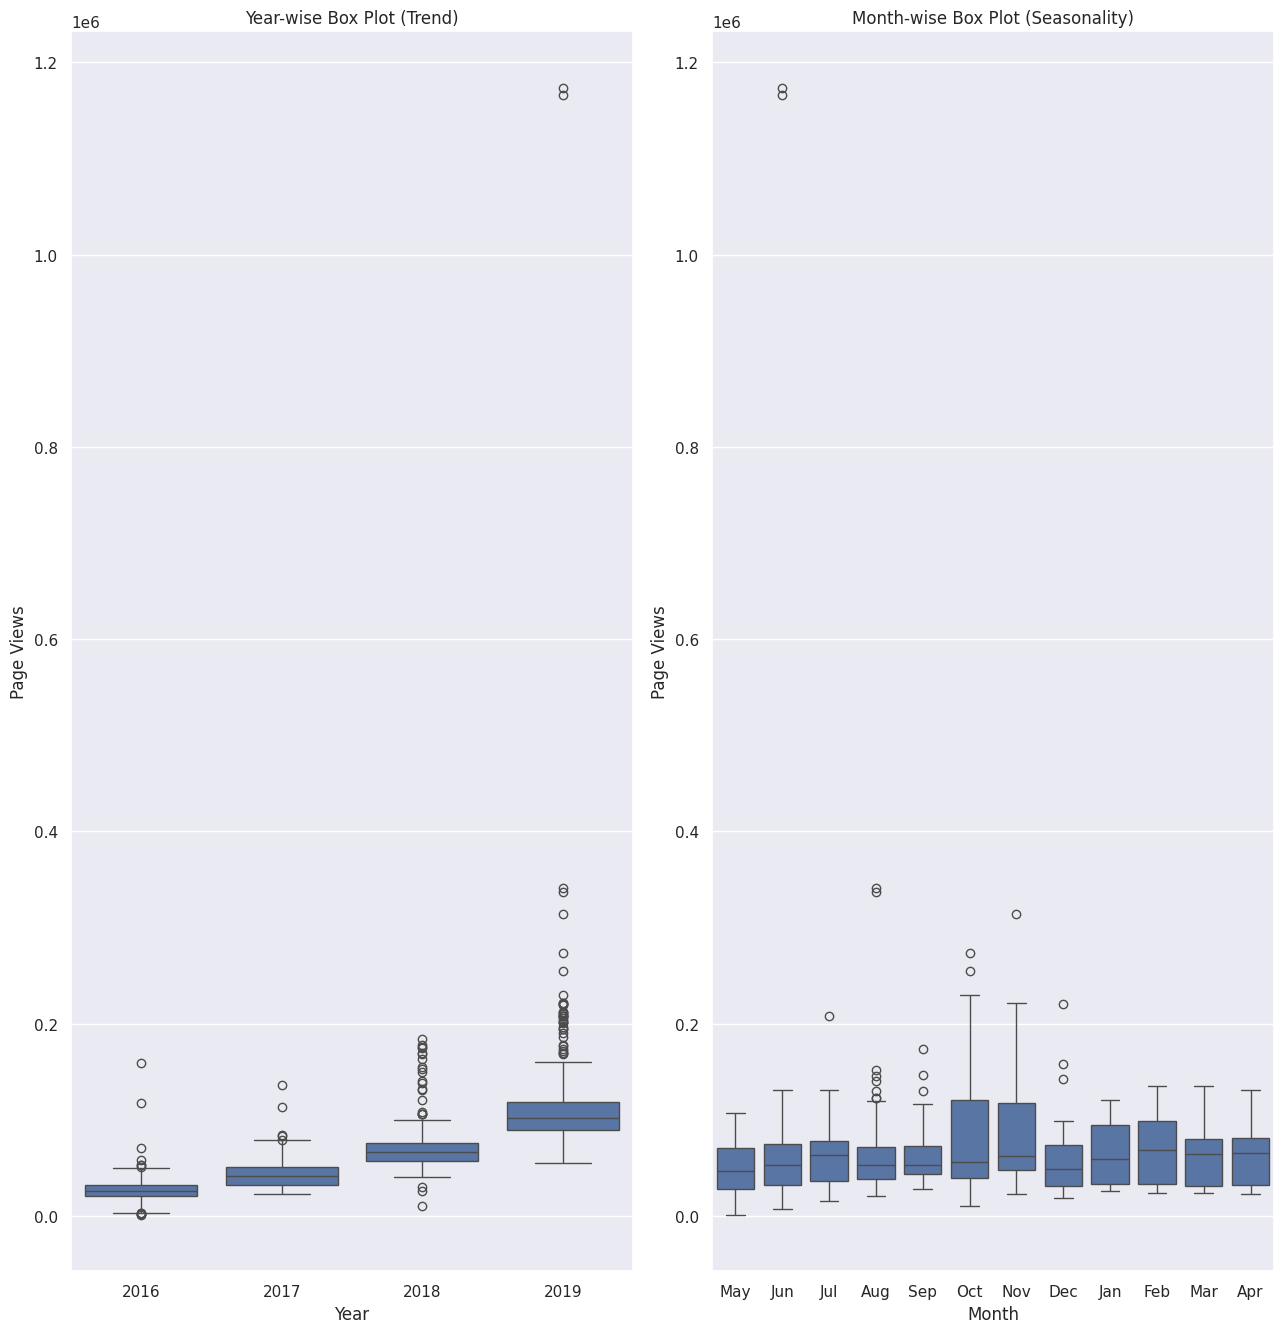

In [ ]:
plt.rcParams["figure.figsize"] = [13, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 2)

sb.boxplot(data = df_box, x = 'year', y = 'value', ax=axes[0])
axes[0].set(title = "Year-wise Box Plot (Trend)", ylabel = "Page Views", xlabel="Year")
sb.boxplot(data = df_box, x = df_box['month'], y = 'value', ax=axes[1])
axes[1].set(title = "Month-wise Box Plot (Seasonality)", ylabel = "Page Views", xlabel="Month")
plt.show()